**Decision Tree Terminologies**
---------------------------------
**Root Node:** Root node is from where the decision tree starts. It represents the entire dataset, which further gets divided into two or more homogeneous sets.

**Leaf Node: **Leaf nodes are the final output node, and the tree cannot be segregated further after getting a leaf node.

**Splitting:** Splitting is the process of dividing the decision node/root node into sub-nodes according to the given conditions.

**Branch/Sub Tree:** A tree formed by splitting the tree.

**Pruning:** Pruning is the process of removing the unwanted branches from the tree.

**Parent/Child node:** The root node of the tree is called the parent node, and other nodes are called the child nodes.

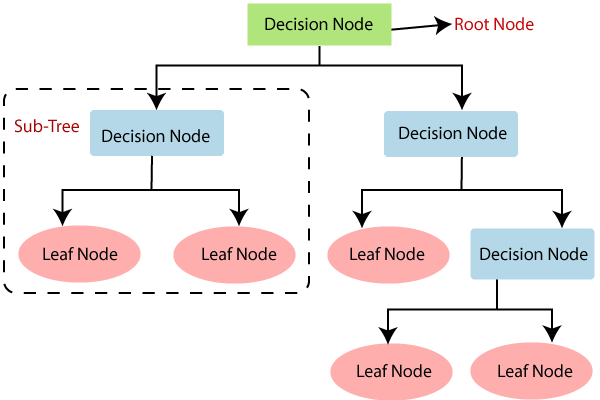

**Step-1**: Begin the tree with the root node, says S, which contains the complete dataset.

**Step-2**: Find the best attribute in the dataset using Attribute Selection Measure (ASM).

**Step-3:** Divide the S into subsets that contains possible values for the best attributes.

**Step-4**: Generate the decision tree node, which contains the best attribute.

**Step-5**: Recursively make new decision trees using the subsets of the dataset created in step -3. Continue this process until a stage is reached where you cannot further classify the nodes and called the final node as a leaf node.



In [ ]:
#Import libraries
import pandas as pd


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 04+-+decisiontreeAdultIncome.csv to 04+-+decisiontreeAdultIncome.csv


In [ ]:
data = pd.read_csv('04+-+decisiontreeAdultIncome.csv')

In [ ]:
data

,age,wc,education,marital status,race,gender,hours per week,IncomeClass
0,38,Private,HS-grad,Divorced,White,Male,40,<=50K
1,28,Private,Bachelors,Married,Black,Female,40,<=50K
2,37,Private,Masters,Married,White,Female,40,<=50K
3,31,Private,Masters,Never-married,White,Female,50,>50K
4,42,Private,Bachelors,Married,White,Male,40,>50K
...,...,...,...,...,...,...,...,...
19782,53,Private,Masters,Married,White,Male,40,>50K
19783,22,Private,Some-college,Never-married,White,Male,40,<=50K
19784,40,Private,HS-grad,Married,White,Male,40,>50K
19785,58,Private,HS-grad,Widowed,White,Female,40,<=50K


In [ ]:
data.isnull().sum(axis=0)

age               0
wc                0
education         0
marital status    0
race              0
gender            0
hours per week    0
IncomeClass       0
dtype: int64

In [ ]:
# Create Dummy variables
data.dtypes
data_prep = pd.get_dummies(data, drop_first=True)



In [ ]:
# Create X and Y Variables
X = data_prep.iloc[:, :-1]
Y = data_prep.iloc[:, -1]


In [ ]:
# Split the X and Y dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = \
train_test_split(X, Y, test_size = 0.3, random_state = 1234, stratify=Y)

**Attribute Selection Measures:**


1.   Information Gain
2.   Gini Index

***1. Information Gain:***

Information gain is the measurement of changes in entropy after the segmentation of a dataset based on an attribute.
It calculates how much information a feature provides us about a class.
According to the value of information gain, we split the node and build the decision tree.

A decision tree algorithm always tries to maximize the value of information gain, and a node/attribute having the highest information gain is split first.

 It can be calculated using the below formula:

     Information Gain= Entropy(S)- [(Weighted Avg) *Entropy(each feature) ]


Entropy: Entropy is a metric to measure the impurity in a given attribute. It specifies randomness in data. Entropy can be calculated as:

**Entropy(s)= -P(yes)log2 P(yes)- P(no) log2 P(no)**
= 6/10* 0.7889 - 4/10 *0.234


Where,

S= Total number of samples

P(yes)= probability of yes

P(no)= probability of no

**Gini Index:**
---------------
Gini index is a measure of impurity or purity used while creating a decision tree in the CART(Classification and Regression Tree) algorithm.

An attribute with the low Gini index should be preferred as compared to the high Gini index.

It only creates binary splits, and the CART algorithm uses the Gini index to create binary splits.

Gini index can be calculated using the below formula:

**Gini Index= 1- ∑jPj2**

In [ ]:
# Import and train classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=1234)
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

In [ ]:
# Test the model
Y_predict = dtc.predict(X_test)


In [ ]:
# Evaluate the model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_predict)
score = dtc.score(X_test, Y_test)


In [ ]:
cm

array([[3814,  559],
       [ 800,  764]])

**Pruning**: Getting an Optimal Decision tree
Pruning is a process of deleting the unnecessary nodes from a tree in order to get the optimal decision tree.

A too-large tree increases the risk of overfitting, and a small tree may not capture all the important features of the dataset. Therefore, a technique that decreases the size of the learning tree without reducing accuracy is known as Pruning. There are mainly two types of tree pruning technology used:

Cost Complexity Pruning
Reduced Error Pruning.

**Advantages of the Decision Tree**
It is simple to understand as it follows the same process which a human follow while making any decision in real-life.
It can be very useful for solving decision-related problems.
It helps to think about all the possible outcomes for a problem.
There is less requirement of data cleaning compared to other algorithms.
**Disadvantages of the Decision Tree**
The decision tree contains lots of layers, which makes it complex.
It may have an overfitting issue, which can be resolved using the Random Forest algorithm.
For more class labels, the computational complexity of the decision tree may increase.

As we already have learned, Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. Mechanisms such as pruning  can be used to set the minimum number of samples required at a leaf node or set the maximum depth of the tree are necessary to avoid this problem.



1) Maximum depth - A tree can grow only up to a specific depth, hence avoiding complex tree structures. This can be achieved by passing max_depth argument in the DecisionTreeClassifier object.



dt = DecisionTreeClassifier(max_depth = 6)



2) Minimum samples leaf -  A tree is allowed to split further only if a minimnum number of samples are present in the leaf. Indirectly controlling the depth of the tree.

dt = DecisionTreeClassifier(min_samples_leaf = 20)